<a href="https://colab.research.google.com/github/baricio00/Health-Informatics-2025-26/blob/main/log1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Dataset

In [1]:
import pandas as pd
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection

df = pd.read_csv('rotterdam.csv')

In [2]:
num_vars = ["year", "age", "nodes", "pgr", "er", "rtime", "dtime"]
cat_vars = ["hospital_id", "meno", "size", "grade", "hormon", "chemo", "recur"]

selected_features = ['age', 'nodes', 'er', 'pgr', 'size', 'grade', 'meno', 'hormon', 'chemo', 'recur'];
df1 = df[selected_features];

In [3]:
np.random.seed(1234)

In [4]:
df

,pid,year,age,hospital_id,meno,size,grade,nodes,pgr,er,hormon,chemo,rtime,recur,dtime,death
0,1,1992,74,16,1,<=20,3,0,35,291,0,0,1799,0,1799,0
1,2,1984,79,4,1,20-50,3,0,36,611,0,0,2828,0,2828,0
2,3,1983,44,2,0,<=20,2,0,138,0,0,0,6012,1,6012,0
3,4,1985,70,5,1,20-50,3,0,0,12,0,0,2624,0,2624,0
4,5,1983,75,17,1,<=20,3,0,260,409,0,0,4915,0,4915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,3003,1990,73,7,1,20-50,3,1,167,142,0,0,1990,1,1990,1
2978,3004,1987,75,0,1,>50,3,11,5,20,1,0,45,1,45,1
2979,3005,1985,79,2,1,20-50,3,6,189,21,0,0,582,0,582,1
2980,3006,1983,71,22,1,<=20,3,0,0,55,0,0,4972,0,4972,1


In [5]:
type(df)


pandas.core.frame.DataFrame

In [6]:
df.shape

(2982, 16)

In [7]:
df.columns


Index(['pid', 'year', 'age', 'hospital_id', 'meno', 'size', 'grade', 'nodes',
       'pgr', 'er', 'hormon', 'chemo', 'rtime', 'recur', 'dtime', 'death'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pid          2982 non-null   int64 
 1   year         2982 non-null   int64 
 2   age          2982 non-null   int64 
 3   hospital_id  2982 non-null   int64 
 4   meno         2982 non-null   int64 
 5   size         2982 non-null   object
 6   grade        2982 non-null   int64 
 7   nodes        2982 non-null   int64 
 8   pgr          2982 non-null   int64 
 9   er           2982 non-null   int64 
 10  hormon       2982 non-null   int64 
 11  chemo        2982 non-null   int64 
 12  rtime        2982 non-null   int64 
 13  recur        2982 non-null   int64 
 14  dtime        2982 non-null   int64 
 15  death        2982 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 372.9+ KB


In [9]:
df.size


47712

$$
P(y = 1 | x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p)}}
$$

In [10]:
df1['size'] = df1['size'].replace({'20-50': '>20', '>50': '>20'});

def categorize_nodes(nodes):
    if nodes == 0:
        return '0'
    elif 1 <= nodes <= 3:
        return '1-3'
    elif 4 <= nodes <= 9:
        return '4-9'
    else:
        return '>10'

def categorize_er(er):
    if er <= 10:
        return '<= 10'
    else:
        return '>10'

def categorize_pgr(pgr):
    if pgr <= 10:
        return '<= 10'
    else:
        return '>10'

df1['nodes'] = df1['nodes'].apply(categorize_nodes);
df1['er'] = df1['er'].apply(categorize_er);
df1['pgr'] = df1['pgr'].apply(categorize_pgr);

cat_var_df1=['meno','hormon','chemo','recur','size','grade', 'nodes', 'er','pgr'];
num_var_df1=['age'];

C:\Users\ricca\AppData\Local\Temp\ipykernel_27784\2662288032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size'] = df1['size'].replace({'20-50': '>20', '>50': '>20'});
C:\Users\ricca\AppData\Local\Temp\ipykernel_27784\2662288032.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nodes'] = df1['nodes'].apply(categorize_nodes);
C:\Users\ricca\AppData\Local\Temp\ipykernel_27784\2662288032.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [11]:
df1

,age,nodes,er,pgr,size,grade,meno,hormon,chemo,recur
0,74,0,>10,>10,<=20,3,1,0,0,0
1,79,0,>10,>10,>20,3,1,0,0,0
2,44,0,<= 10,>10,<=20,2,0,0,0,1
3,70,0,>10,<= 10,>20,3,1,0,0,0
4,75,0,>10,>10,<=20,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2977,73,1-3,>10,>10,>20,3,1,0,0,1
2978,75,>10,>10,<= 10,>20,3,1,1,0,1
2979,79,4-9,>10,>10,>20,3,1,0,0,0
2980,71,0,>10,<= 10,<=20,3,1,0,0,0


In [12]:
import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X=df1.drop('recur',axis=1)
y=df1['recur']


numeric_vars = num_var_df1.copy()
categorical_vars = cat_var_df1.copy()
categorical_vars.remove('recur')

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()
n = len(y_test)

train_index = X_train.index
test_index = X_test.index

# Create DataFrames with proper column names for statsmodels
X_train_processed = pd.DataFrame(X_train_proc, columns=feature_names, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_proc, columns=feature_names, index=X_test.index)

# Add constant to the processed DataFrames for statsmodels
X_train_processed = sm.add_constant(X_train_processed)
X_test_processed = sm.add_constant(X_test_processed)

logit_model = sm.Logit(y_train, X_train_processed).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.615543
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  recur   No. Observations:                 2385
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.1118
Time:                        23:59:27   Log-Likelihood:                -1468.1
converged:                       True   LL-Null:                       -1652.8
Covariance Type:            nonrobust   LLR p-value:                 1.772e-72
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1515      0.170     -6.786      0.000      -1.484      -0.819
num__age         

In [13]:
train_index = X_train.index
test_index = X_test.index

new_cat_vars = ['meno','hormon','chemo','size','grade', 'nodes', 'er','pgr'];

X_train_1 = X_train[new_cat_vars]
X_test_1 = X_test[new_cat_vars]

X_train_1 = sm.add_constant(X_train_1)
X_test_1 = sm.add_constant(X_test_1)

In [14]:
logit_model = sm.Logit(y_train, X_train_proc).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.625483
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  recur   No. Observations:                 2385
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                 0.09744
Time:                        23:59:27   Log-Likelihood:                -1491.8
converged:                       True   LL-Null:                       -1652.8
Covariance Type:            nonrobust   LLR p-value:                 3.246e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0549      0.067     -0.825      0.409      -0.185       0.075
x2            -0.5515      0.

In [15]:
coef = logit_model.params
odds_ratios = np.exp(coef) # e^coef

conf = logit_model.conf_int()
conf.columns = ['2.5%', '97.5%']
conf = np.exp(conf)  # Exponentiate the betas' CIs to get ORs' CIs

or_summary = pd.DataFrame({
    "Coefficient": coef,
    "Odds Ratio": odds_ratios,
    "2.5% CI OR": conf['2.5%'],
    "97.5% CI OR": conf['97.5%']
})

print(or_summary)

     Coefficient  Odds Ratio  2.5% CI OR  97.5% CI OR
x1     -0.054886    0.946593    0.830913     1.078379
x2     -0.551545    0.576059    0.448505     0.739889
x3     -0.594865    0.551637    0.399349     0.761998
x4     -0.506475    0.602616    0.440872     0.823699
x5      0.334962    1.397888    1.173307     1.665455
x6      0.302623    1.353404    1.135083     1.613718
x7      0.469738    1.599575    1.214380     2.106951
x8      1.159834    3.189403    2.401294     4.236172
x9      2.569682   13.061674    8.141786    20.954533
x10    -0.190148    0.826837    0.653950     1.045430
x11    -0.381883    0.682575    0.546347     0.852770


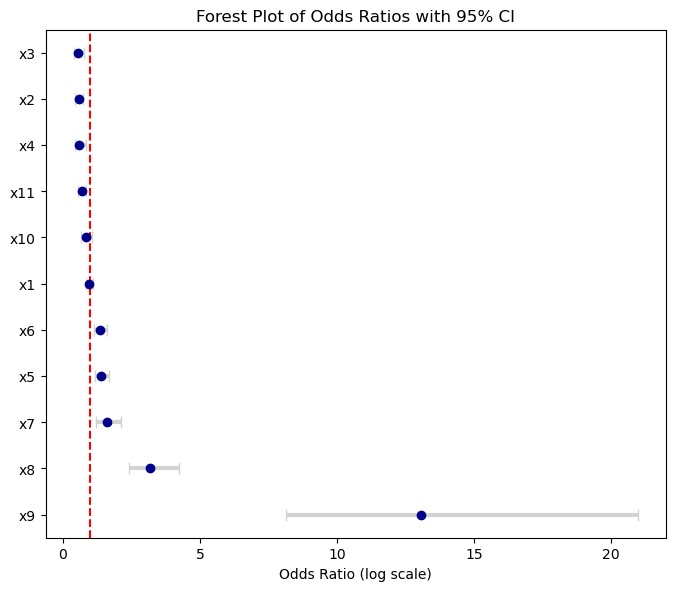

In [16]:
# Sort by odds ratio for better visualization
or_summary = or_summary.sort_values(by="Odds Ratio", ascending=False)

# Drop 'const' if present to avoid KeyError
or_summary = or_summary.drop('const', errors='ignore')

fig, ax = plt.subplots(figsize=(8, len(or_summary) * 0.6))

# Plot the OR as points with confidence intervals
ax.errorbar(or_summary['Odds Ratio'], or_summary.index,
            xerr=[or_summary['Odds Ratio'] - or_summary['2.5% CI OR'], or_summary['97.5% CI OR'] - or_summary['Odds Ratio']],
            fmt='o', color='darkblue', ecolor='lightgray', elinewidth=3, capsize=4)

# Add a vertical line at OR = 1 (meaning no effect)
ax.axvline(1, color='red', linestyle='--')

ax.set_xlabel("Odds Ratio (log scale)")
ax.set_title("Forest Plot of Odds Ratios with 95% CI")
#ax.set_xscale("log")  # Log scale is sometimes useful for better visualization

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
# Use the preprocessed array without the added constant to match the model trained in cell 16
y_test_pred_prob = logit_model.predict(X_test_proc)

In [19]:
threshold = 0.5
y_test_pred_class = (y_test_pred_prob > threshold).astype(int)

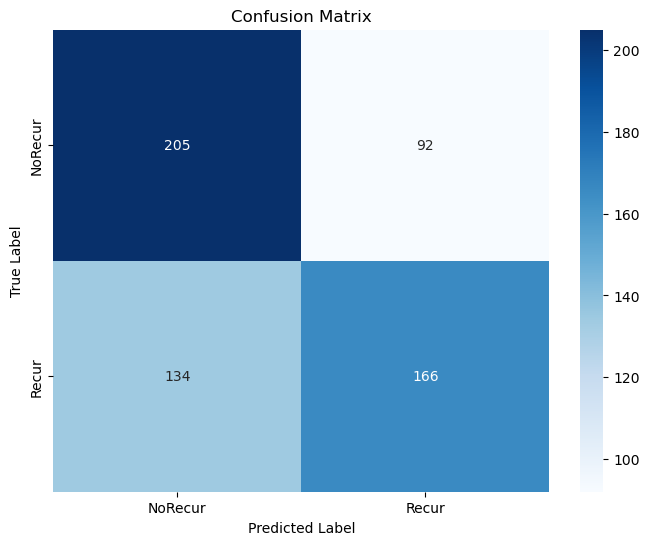

In [20]:
cm = confusion_matrix(y_test, y_test_pred_class)

class_names = ['NoRecur', 'Recur']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
tn, fp, fn, tp = cm.ravel()
tpr_original = tp / (tp + fn) if (tp + fn) > 0 else 0.0
fpr_original = fp / (fp + tn) if (fp + tn) > 0 else 0.0
print(f'FPR={fpr_original}, TPR={tpr_original}')

FPR=0.30976430976430974, TPR=0.5533333333333333


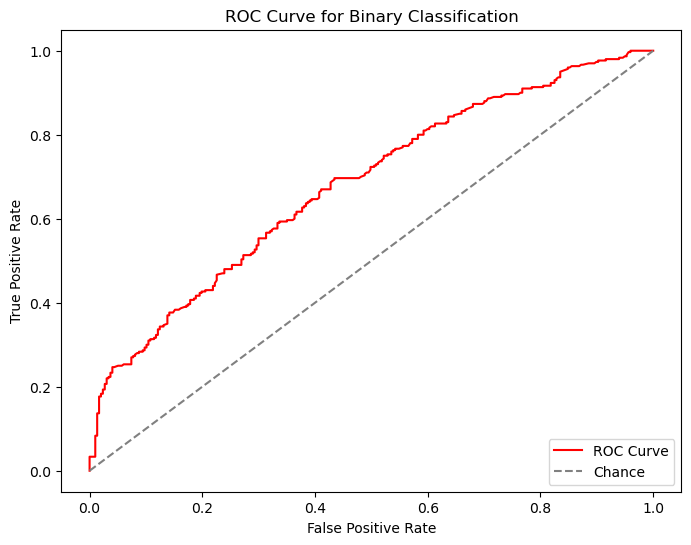

In [22]:
from sklearn.metrics import roc_curve

# computes the roc curve as a set of points (fpr, tpr)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob) # the third elements that it returns are the thresholds

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='red', label=f"ROC Curve")

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_test_pred_prob)
print(f"ROC-AUC Score on Test Set: {auc_score}")

ROC-AUC Score on Test Set: 0.6802132435465769


In [24]:
from sklearn.metrics import classification_report

print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred_class, target_names=['NoRecur', 'Recur'], digits=4))

Classification Report on Test Set:
              precision    recall  f1-score   support

     NoRecur     0.6047    0.6902    0.6447       297
       Recur     0.6434    0.5533    0.5950       300

    accuracy                         0.6214       597
   macro avg     0.6241    0.6218    0.6198       597
weighted avg     0.6242    0.6214    0.6197       597



In [25]:
numeric_vars = num_var_df1.copy()
categorical_vars_2 = cat_var_df1.copy()
categorical_vars_2.remove('recur')
categorical_vars_2.remove('meno')
categorical_vars_2.remove('er')
categorical_vars_2.remove('pgr')

preprocessor_2 = ColumnTransformer([
    ('num', StandardScaler(), numeric_vars),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars_2)
])

X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(X, y, test_size=0.20, random_state=1234)

X_train_proc_2 = preprocessor_2.fit_transform(X_train)
X_test_proc_2 = preprocessor_2.transform(X_test)
feature_names_2 = preprocessor_2.get_feature_names_out()
n_2 = len(y_test)

train_index_2 = X_train.index
test_index_2 = X_test.index

# Create DataFrames with proper column names for statsmodels
X_train_processed_2 = pd.DataFrame(X_train_proc_2, columns=feature_names_2, index=X_train_2.index)
X_test_processed_2 = pd.DataFrame(X_test_proc_2, columns=feature_names_2, index=X_test_2.index)

# Add constant to the processed DataFrames for statsmodels
X_train_processed_2 = sm.add_constant(X_train_processed_2)
X_test_processed_2 = sm.add_constant(X_test_processed_2)

logit_model_2 = sm.Logit(y_train_2, X_train_processed_2).fit()

print(logit_model_2.summary())

Optimization terminated successfully.
         Current function value: 0.616013
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  recur   No. Observations:                 2385
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.1111
Time:                        23:59:28   Log-Likelihood:                -1469.2
converged:                       True   LL-Null:                       -1652.8
Covariance Type:            nonrobust   LLR p-value:                 1.837e-74
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1843      0.104    -11.375      0.000      -1.388      -0.980
num__age         

In [26]:
coef_2 = logit_model_2.params
odds_ratios_2 = np.exp(coef_2) # e^coef

conf_2 = logit_model_2.conf_int()
conf_2.columns = ['2.5%', '97.5%']
conf_2 = np.exp(conf_2)  # Exponentiate the betas' CIs to get ORs' CIs

or_summary_2 = pd.DataFrame({
    "Coefficient": coef_2,
    "Odds Ratio": odds_ratios_2,
    "2.5% CI OR": conf_2['2.5%'],
    "97.5% CI OR": conf_2['97.5%']
})

print(or_summary_2)

                Coefficient  Odds Ratio  2.5% CI OR  97.5% CI OR
const             -1.184300    0.305960    0.249484     0.375221
num__age          -0.298738    0.741754    0.670263     0.820869
cat__hormon_1     -0.599701    0.548976    0.397790     0.757621
cat__chemo_1      -0.447277    0.639367    0.468649     0.872273
cat__size_>20      0.518769    1.679959    1.401306     2.014021
cat__grade_3       0.656331    1.927707    1.576564     2.357059
cat__nodes_1-3     0.538173    1.712875    1.299947     2.256970
cat__nodes_4-9     1.219803    3.386519    2.549493     4.498349
cat__nodes_>10     2.590720   13.339376    8.304250    21.427457


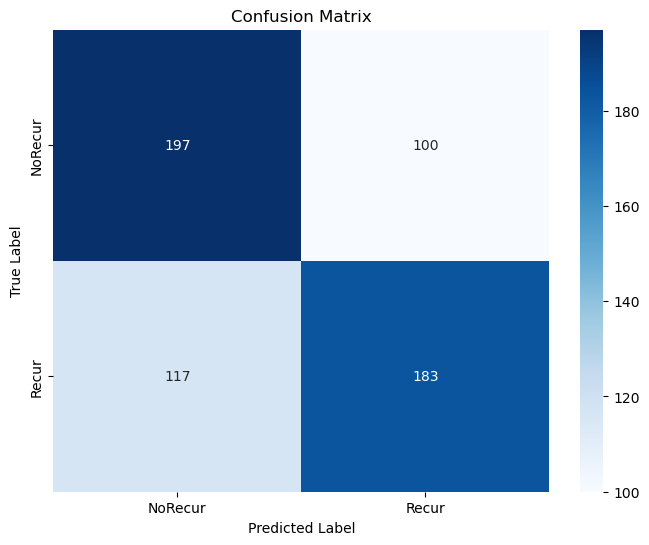

In [27]:
y_test_pred_prob_2 = logit_model_2.predict(X_test_processed_2)
threshold_2 = 0.47
y_test_pred_class_2 = (y_test_pred_prob_2 > threshold_2).astype(int)

cm_2 = confusion_matrix(y_test_2, y_test_pred_class_2)

class_names_2 = ['NoRecur', 'Recur']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names_2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
tn, fp, fn, tp = cm_2.ravel()
tpr_original = tp / (tp + fn) if (tp + fn) > 0 else 0.0
fpr_original = fp / (fp + tn) if (fp + tn) > 0 else 0.0
print(f'FPR={fpr_original}, TPR={tpr_original}')

FPR=0.3367003367003367, TPR=0.61


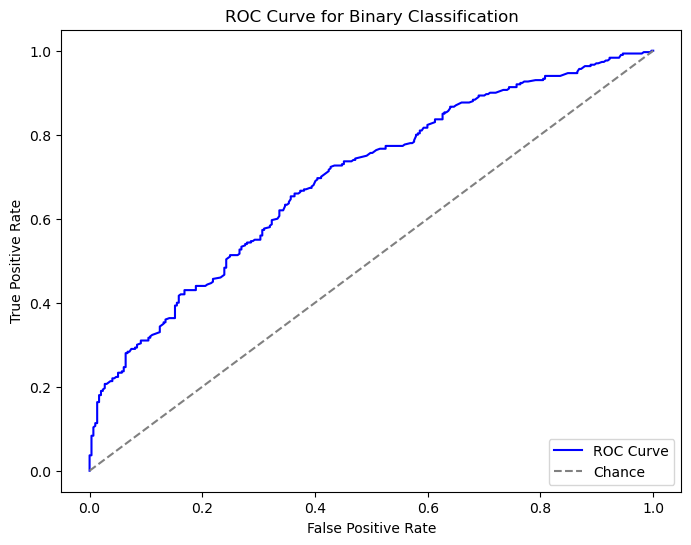

In [29]:
from sklearn.metrics import roc_curve

# computes the roc curve as a set of points (fpr, tpr)
fpr, tpr, _ = roc_curve(y_test_2, y_test_pred_prob_2) # the third elements that it returns are the thresholds

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve")

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Classification")
plt.legend(loc="lower right")
plt.show()

In [30]:
candidate_threshold_1 = 1 - df1['recur'].mean()

In [31]:
candidate_threshold_1

np.float64(0.5060362173038229)

In [32]:
y_test_pred_class_2 = (y_test_pred_prob_2 > candidate_threshold_1).astype(int)

print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test_2, y_test_pred_class_2))

Confusion Matrix on Test Set:
[[217  80]
 [141 159]]


In [33]:
print("\nClassification Report on Test Set:")
print(classification_report(y_test_2, y_test_pred_class_2))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       297
           1       0.67      0.53      0.59       300

    accuracy                           0.63       597
   macro avg       0.64      0.63      0.63       597
weighted avg       0.64      0.63      0.63       597



In [34]:
tn, fp, fn, tp = confusion_matrix(y_test_2, y_test_pred_class_2).ravel()

tpr_2 = tp / (tp + fn)  # Sensitivity or Recall or TPR
fpr_2 = fp / (fp + tn)  # False Positive Rate (FPR)

print(f'FPR={fpr_2}, TPR={tpr_2}')

FPR=0.26936026936026936, TPR=0.53


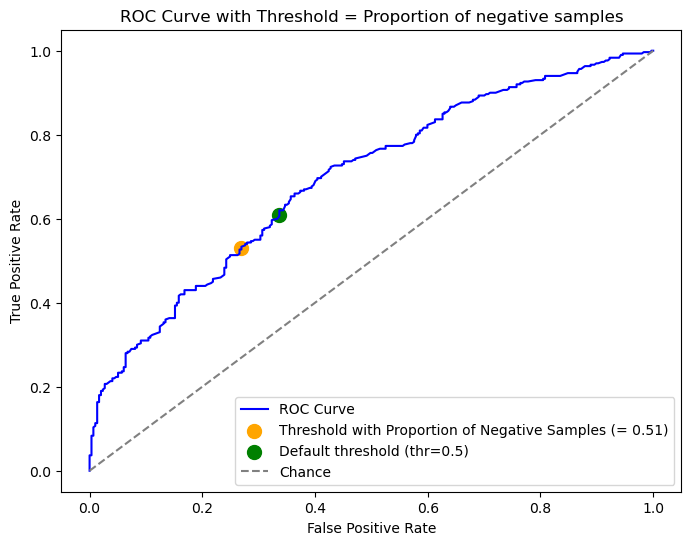

In [35]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve")

# Plot the point corresponding to the candidate threshold point
plt.scatter(fpr_2, tpr_2, color='orange', s=100, label=f"Threshold with Proportion of Negative Samples (= {candidate_threshold_1:.2f})")

# Plot the point corresponding to the original threshold point
plt.scatter(fpr_original, tpr_original, color='green', s=100, label=f"Default threshold (thr=0.5)")

# Plot the diagonal line representing random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Chance")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold = Proportion of negative samples")
plt.legend(loc="lower right")
plt.show()

In [36]:
df

,pid,year,age,hospital_id,meno,size,grade,nodes,pgr,er,hormon,chemo,rtime,recur,dtime,death
0,1,1992,74,16,1,<=20,3,0,35,291,0,0,1799,0,1799,0
1,2,1984,79,4,1,20-50,3,0,36,611,0,0,2828,0,2828,0
2,3,1983,44,2,0,<=20,2,0,138,0,0,0,6012,1,6012,0
3,4,1985,70,5,1,20-50,3,0,0,12,0,0,2624,0,2624,0
4,5,1983,75,17,1,<=20,3,0,260,409,0,0,4915,0,4915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977,3003,1990,73,7,1,20-50,3,1,167,142,0,0,1990,1,1990,1
2978,3004,1987,75,0,1,>50,3,11,5,20,1,0,45,1,45,1
2979,3005,1985,79,2,1,20-50,3,6,189,21,0,0,582,0,582,1
2980,3006,1983,71,22,1,<=20,3,0,0,55,0,0,4972,0,4972,1


In [37]:
# Define the mapping for label encoding the 'nodes' column
node_mapping = {
    '0': 0,
    '1-3': 1,
    '4-9': 2,
    '>10': 3
}

# Apply the mapping to the 'nodes' column in df1
df1['nodes'] = df1['nodes'].map(node_mapping)

print("Transformed 'nodes' column head:")
print(df1['nodes'].head())
print("\nTransformed 'nodes' column unique values:")
print(df1['nodes'].unique())

Transformed 'nodes' column head:
0    0
1    0
2    0
3    0
4    0
Name: nodes, dtype: int64

Transformed 'nodes' column unique values:
[0 2 1 3]


C:\Users\ricca\AppData\Local\Temp\ipykernel_27784\2817234014.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nodes'] = df1['nodes'].map(node_mapping)


In [38]:
df1

,age,nodes,er,pgr,size,grade,meno,hormon,chemo,recur
0,74,0,>10,>10,<=20,3,1,0,0,0
1,79,0,>10,>10,>20,3,1,0,0,0
2,44,0,<= 10,>10,<=20,2,0,0,0,1
3,70,0,>10,<= 10,>20,3,1,0,0,0
4,75,0,>10,>10,<=20,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2977,73,1,>10,>10,>20,3,1,0,0,1
2978,75,3,>10,<= 10,>20,3,1,1,0,1
2979,79,2,>10,>10,>20,3,1,0,0,0
2980,71,0,>10,<= 10,<=20,3,1,0,0,0


In [39]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df1, columns=cat_var_df1, drop_first=True, dtype=int)

In [40]:
df_encoded

,age,meno_1,hormon_1,chemo_1,recur_1,size_>20,grade_3,nodes_1,nodes_2,nodes_3,er_>10,pgr_>10
0,74,1,0,0,0,0,1,0,0,0,1,1
1,79,1,0,0,0,1,1,0,0,0,1,1
2,44,0,0,0,1,0,0,0,0,0,0,1
3,70,1,0,0,0,1,1,0,0,0,1,0
4,75,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2977,73,1,0,0,1,1,1,1,0,0,1,1
2978,75,1,1,0,1,1,1,0,0,1,1,0
2979,79,1,0,0,0,1,1,0,1,0,1,1
2980,71,1,0,0,0,0,1,0,0,0,1,0


In [41]:
X = df_encoded[[
    "age",
    "meno_1",
    "hormon_1",
    "chemo_1",
    "size_>20",
    "grade_3",
    "nodes_1",
    "nodes_2",
    "nodes_3",
    "er_>10",
    "pgr_>10"
]]
y = df_encoded['recur_1']  # Multiclass target variable

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [42]:
y_train

737     1
2980    0
1677    1
2443    1
2976    1
       ..
2847    0
420     0
2938    0
713     0
2053    1
Name: recur_1, Length: 2385, dtype: int64

In [43]:
model = sm.MNLogit(y_train, X_train)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.614273
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                recur_1   No. Observations:                 2385
Model:                        MNLogit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Jan 2026   Pseudo R-squ.:                  0.1137
Time:                        23:59:29   Log-Likelihood:                -1465.0
converged:                       True   LL-Null:                       -1653.0
Covariance Type:            nonrobust   LLR p-value:                 8.016e-74
 recur_1=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3307      0.283      1.169      0.242      -0.224       0.885
age           -0.0262      0.

In [44]:
result.params

,0
const,0.330678
age,-0.026180
meno_1,-0.012266
hormon_1,-0.666519
chemo_1,-0.448385
size_>20,0.503540
grade_3,0.548736
nodes_1,0.570752
nodes_2,1.252329
nodes_3,2.810109


In [45]:
from sklearn.model_selection import KFold

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Initialize KFold with 10 splits
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=1234)

# Initialize lists to store metrics for each fold
mse_scores = []
mae_scores = []

X_const_fold = sm.add_constant(X, has_constant="add")

# Cross-Validation loop
for train_index, test_index in kf.split(X):
    # Select the training and test data for the current iteration
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_fold = X_const_fold.iloc[train_index]
    X_test_fold  = X_const_fold.iloc[test_index]

    # Fit the model on the current training folds using Binomial family for logistic regression
    logit_model_cv = sm.GLM(y_train_fold, X_train_fold, family=sm.families.Binomial()).fit()

    # Compute the output on the current test fold
    y_pred = logit_model_cv.predict(X_test_fold)

    # Compute and store MSE and MAE
    mse_scores.append(mean_squared_error(y_test_fold, y_pred))
    mae_scores.append(mean_absolute_error(y_test_fold, y_pred))

# Calculate mean and standard deviation for each metric across all folds
mse_mean, mse_std = np.mean(mse_scores), np.std(mse_scores)
mae_mean, mae_std = np.mean(mae_scores), np.std(mae_scores)

print(f"10-Fold CV Mean Squared Error: Mean={mse_mean:.4f}, Std={mse_std:.4f}")
print(f"10-Fold CV Mean Absolute Error: Mean={mae_mean:.4f}, Std={mae_std:.4f}")

10-Fold CV Mean Squared Error: Mean=0.2168, Std=0.0079
10-Fold CV Mean Absolute Error: Mean=0.4316, Std=0.0077
